In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

DIR = "/content/drive/MyDrive/Competitions/Signate/OCEAN180"
INPUT_DIR = os.path.join(DIR,"input")
OUTPUT_DIR = os.path.join(DIR,"output")

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train = pd.read_csv(os.path.join(INPUT_DIR,"train_data.csv"))
test = pd.read_csv(os.path.join(INPUT_DIR,"test_data.csv"))
sample_sub = pd.read_csv(os.path.join(INPUT_DIR,"submit_example.csv"), header=None)

print(train.shape)
display(train.head(3))

print(test.shape)
display(test.head(3))

print(sample_sub.shape)
display(sample_sub.head(3))

(14140, 3465)


,Unnamed: 0,lat,lon,area,YMD,year,month,cover,depth_original,cliff_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.989139,125.243167,20.0,20110926,2011.0,9.0,0.050,NaN,0.0,...,0.507961,0.287288,-0.278071,-0.808075,-2.341663,2.353039,95.142525,3.728732,-2.405135,3725_10
1,1,26.996172,127.912024,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.725,NaN,0.0,...,0.353645,0.245048,-0.100556,-0.771423,-3.282602,4.672225,174.767501,-0.571513,0.448861,4027_13
2,2,26.363556,127.735139,20.0,20091014,2009.0,10.0,0.025,NaN,0.0,...,0.579204,0.281260,-0.191884,-0.853730,-3.160207,3.324236,62.711236,3.284478,-57.136191,3927_22


(4039, 3464)


,Unnamed: 0,lat,lon,area,YMD,year,month,depth_original,cliff_length,aicial_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.352222,124.202674,20.0,2002.12,2002.0,12.0,0.5,0.000000,725.621704,...,0.409346,0.323023,-0.066356,-0.560810,-3.203797,4.297234,926.905329,1.669992,0.194766,3624_20
1,1,24.420028,124.078583,20.0,20100723,2010.0,7.0,NaN,0.000000,0.000000,...,0.540733,0.275585,-0.291240,-0.824888,-2.222276,2.263106,57.661693,4.274851,-79.273275,3624_20
2,2,26.494197,127.836013,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,13.8,73.183418,80.595177,...,0.601792,0.252251,-0.318454,-0.861477,-2.060505,2.099250,42.672829,5.655713,-2.061417,3927_23


(4039, 2)


,0,1
0,0,0.47
1,1,0.68
2,2,0.25


In [5]:
train.rename(columns={"Unnamed: 0":"id"}, inplace=True)
test.rename(columns={"Unnamed: 0":"id"}, inplace=True)

In [6]:
def missing_func(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  df_missing = pd.concat([total,percent],axis=1,keys=['total','percent'])
  return df_missing 

In [7]:
train_missing = missing_func(train)
test_missing = missing_func(test)

In [8]:
train_cols = train.columns.tolist()
test_cols = test.columns.tolist()

target = set(train_cols) - set(test_cols)
print(target)

display(train[target].head(3))

{'cover'}


,cover
0,0.050
1,0.725
2,0.025


max : 1.000000
min : 0.000000
Skewness: 1.570970
Kurtosis: 1.087887


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


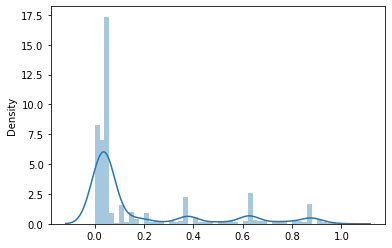

In [9]:
sns.distplot(train[target])

print("max : %f" %train[target].max())
print("min : %f" %train[target].min())
print('Skewness: %f' %train[target].skew())  #歪度
print('Kurtosis: %f' %train[target].kurt())  #尖度

In [10]:
train["depth_flag"] = 0
train.loc[train["depth"]<=1.0, "depth_flag"] = 1

In [11]:
train["cover_flag"] = 0
train.loc[train["cover"]>.2, "cover_flag"] = 1

In [12]:
train_missing_50 = train_missing[train_missing.percent<0.5].index
test_missing_50 =  test_missing[test_missing.percent<0.5].index

categorical_features = train.dtypes[train.dtypes=="object"].index

features = set(train_missing_50) & set(test_missing_50)
features = set(features) - set(categorical_features) 

In [13]:
display(train[features])

,MAX_DSWI_2008,MIN_AVI_2018,MED_mCRIRE_2003,MAX_TIRS1_2000,MIN_NIR_2001,MED_MCARI2_2014,MIN_PPR_2017,MED_GARI_2009,MIN_mCRIRE_2012,MAX_Red_2019,...,MAX_GLI_2013,MIN_Ferric_Oxides_2002,MIN_SIPI2_2012,MIN_mCRIG_2007,MAX_MCARI1_2002,MIN_NLI_2013,MAX_SWIR2_2020,MIN_Red_2012,SIPI2,MED_NormG_2019
0,2.722115,-70.490234,-0.298464,8.674911,5.234353,1.096721,-0.282026,-0.251280,-0.264809,152.899094,...,-0.017377,NaN,5.133805,-0.128305,NaN,0.344875,0.943004,12.291277,5.133805,0.573863
1,2.881928,-4.779106,NaN,NaN,8.218288,0.223050,-0.104806,NaN,NaN,52.353207,...,0.081361,NaN,NaN,-0.023929,NaN,0.439159,1.149916,NaN,-0.334153,0.369284
2,2.330763,-64.731548,-0.263160,8.520046,8.338846,1.262074,-0.176517,-0.096426,-0.216791,33.453712,...,0.053506,0.103064,2.787105,-0.061557,15.838764,0.349361,0.154279,103.491577,4.059874,0.541194
3,NaN,-32.241039,NaN,NaN,5.620660,2.246984,-0.279192,NaN,NaN,19.501633,...,0.013144,NaN,NaN,NaN,NaN,0.305798,0.378826,NaN,NaN,0.705159
4,NaN,-24.925941,NaN,NaN,3.847025,2.722762,-0.333899,NaN,NaN,15.453188,...,-0.027817,NaN,NaN,NaN,NaN,0.316716,0.344385,NaN,9.859806,0.749382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,2.410799,-22.867668,-0.696946,8.859181,12.569870,0.738514,-0.302194,-0.383347,NaN,92.023842,...,-0.010698,0.097316,NaN,-0.184550,40.094706,0.488765,2.142155,NaN,17.306462,0.517387
14136,2.966800,-42.657795,NaN,NaN,18.758379,1.782057,-0.234064,NaN,NaN,32.745827,...,0.073557,NaN,NaN,NaN,NaN,0.076195,0.303088,NaN,3.296003,0.663954
14137,3.400373,-24.419233,NaN,8.545913,NaN,1.508435,-0.211221,-0.214513,-0.326936,35.169872,...,0.044129,NaN,6.771838,NaN,NaN,0.345020,0.255741,12.069804,NaN,0.620370
14138,NaN,-117.062759,NaN,NaN,9.048688,0.060781,-0.197563,NaN,NaN,102.212357,...,0.091297,NaN,NaN,NaN,NaN,0.805568,1.233069,NaN,NaN,0.498236


In [14]:
tr_mesh = train.mesh20.value_counts().index
te_mesh = test.mesh20.value_counts().index

test_only_mesh = list(set(te_mesh)-set(tr_mesh))
test_mesh = list(set(te_mesh)-set(test_only_mesh))

In [15]:
def get_mesh_values(df):
  _df = df["mesh20"].str.split('_').apply(pd.Series).astype(float)
  _df.columns = ["mesh20_left","mesh20_right"]
  df["mesh20_left"] = _df["mesh20_left"].astype(int)
  df["mesh20_right"] = _df["mesh20_right"].astype(int)
  return df

In [16]:
train = get_mesh_values(train)
test = get_mesh_values(test)

In [17]:
tr_mesh_l = train.mesh20_left.value_counts().index
te_mesh_l = test.mesh20_left.value_counts().index

tr_mesh_r = train.mesh20_right.value_counts().index
te_mesh_r = test.mesh20_right.value_counts().index

print(set(te_mesh_l)-set(tr_mesh_l))
print(set(te_mesh_r)-set(tr_mesh_r))

set()
set()


## Model

In [18]:
!pip install iterative-stratification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, GroupKFold, StratifiedGroupKFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score

In [20]:
class CFG:
  ver=7
  model="lightgbm"
  n_folds=4
  trn_fold=[0, 1, 2, 3]
  seed=42
  target_cols1="cover_flag"
  target_cols2="cover"
  boosting_type="gbdt"
  fold_target1="cover_flag"
  fold_target2="cover"
  fold_target3="cover"

In [21]:
# =========================================================================================
# CV split
# =========================================================================================
target_bins = [-1, .3, .5, 1]
target_bin_name = ['0-0.3', '0.3-0.5', '0.5-']
train["target_bins"] = pd.cut(train[target].cover, bins=target_bins, labels=target_bin_name)
bins_map = {'0-0.3':0,  '0.3-0.5':1, '0.5-':2}
train["bins"] = train["target_bins"].map(bins_map)

def get_fold(df,fold_target, isFlag=False):
  if isFlag:
    Fold = StratifiedKFold(n_splits=CFG.n_folds, shuffle=True, random_state=CFG.seed)
    for n, (train_index, val_index) in enumerate(Fold.split(df, df[fold_target])):
        df.loc[val_index, 'fold'] = int(n)
  else:
    Fold = GroupKFold(n_splits=CFG.n_folds)
    for n, (train_index, val_index) in enumerate(Fold.split(df, df[fold_target],groups=df["mesh20"])):
      df.loc[val_index, 'fold'] = int(n)
  df['fold'] = df['fold'].astype(int)
  display(df.groupby('fold').size())
  return df

In [22]:
def get_score(labels, preds, isFlag=False):
  if isFlag:
    f1score = f1_score(labels, preds)
    pscore = precision_score(labels, preds)
    rscore =recall_score(labels, preds)
    print(f"F1 Score : {f1score}")
    print(f"Precision Score : {pscore}")
    print(f"Recall Score {rscore}")
  else:
    rmse = np.sqrt(mean_squared_error(labels, preds))
    print(f"RMSE {rmse}")

In [23]:
features = list(features)
features.remove('id')

In [24]:
params1 = {
        'objective': "binary",
        'metric': 'binary_logloss',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.6,
        "n_estimators":1000
    }

params2 = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.6,
        "n_estimators":1000
    }

In [25]:
def get_pred(df, test, fold_target, target_cols, model, isFlag=False):
  if isFlag:
    pred_name = "flag"
    train = get_fold(df, fold_target, isFlag=True)
  else:
    pred_name = ""
    train = get_fold(df, fold_target, isFlag=False)
  oof_df = pd.DataFrame()
  df_importance = pd.DataFrame({'feature': features})
  df_importance['importance'] = 0
  test_preds = np.zeros((len(test), CFG.n_folds))

  for fold in range(CFG.n_folds):
    if fold in CFG.trn_fold:
      print("="*15,f" FOLD : {fold} ","="*15)
      train_folds = train[train['fold'] != fold]
      valid_folds = train[train['fold'] == fold]

      train_X = train_folds[features].values
      valid_X = valid_folds[features].values
      test_X = test[features].values
      train_labels = train_folds[target_cols].values
      valid_labels = valid_folds[target_cols].values

      clf = model
      #model = lgb.LGBMRegressor(**params)
      clf.fit(train_X, train_labels,
              eval_set=[(valid_X, valid_labels)],
              #eval_metric="rmse",
              verbose = 200,
              early_stopping_rounds=50)
      
      valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)
      test_preds[:, fold] = model.predict(test_X)
      oof_df = pd.concat([oof_df, valid_folds])

      f_importance = np.array(model.feature_importances_)
      temp_importance = pd.DataFrame({'feature': features, 'importance': f_importance})
      df_importance['importance'] += temp_importance['importance']

      get_score(valid_labels, valid_folds[f"{pred_name}_pred"], isFlag)

  df_importance['importance'] = df_importance['importance'] / np.sum(df_importance['importance'])
  df_importance = df_importance.sort_values('importance', ascending=False)
  display(df_importance.head(35))
  fig = plt.figure(figsize=(16, 32), tight_layout=True)
  sns.barplot(x="importance", y="feature", data=df_importance.head(35))
  plt.title("LightGBM feature importances")
  get_score(oof_df[target_cols], oof_df[f"{pred_name}_pred"], isFlag)
  return oof_df,  test_preds

fold
0    3535
1    3535
2    3535
3    3535
dtype: int64

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[115]	valid_0's binary_logloss: 0.150773


<ipython-input-25-5820d0f1dec2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


F1 Score : 0.8859293572669368
Precision Score : 0.9053254437869822
Recall Score 0.8673469387755102
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[119]	valid_0's binary_logloss: 0.154145


<ipython-input-25-5820d0f1dec2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


F1 Score : 0.8701673398730526
Precision Score : 0.8860164512338425
Recall Score 0.854875283446712
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[116]	valid_0's binary_logloss: 0.139929


<ipython-input-25-5820d0f1dec2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


F1 Score : 0.8891468369123622
Precision Score : 0.9119047619047619
Recall Score 0.8674971687429218
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[111]	valid_0's binary_logloss: 0.135296


<ipython-input-25-5820d0f1dec2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


F1 Score : 0.8921679909194097
Precision Score : 0.89419795221843
Recall Score 0.8901472253680635


,feature,importance
975,depth,0.011858
2738,month,0.011641
784,sst_ymd,0.010918
1507,hist_warm_sst,0.005061
2993,area,0.005061
145,fetch,0.004917
2231,MIN_GARI,0.004845
854,warm_sst,0.004700
1569,sst_diff,0.004555
2079,MAX_B03,0.003688


F1 Score : 0.8843772498200143
Precision Score : 0.8992679355783308
Recall Score 0.8699716713881019


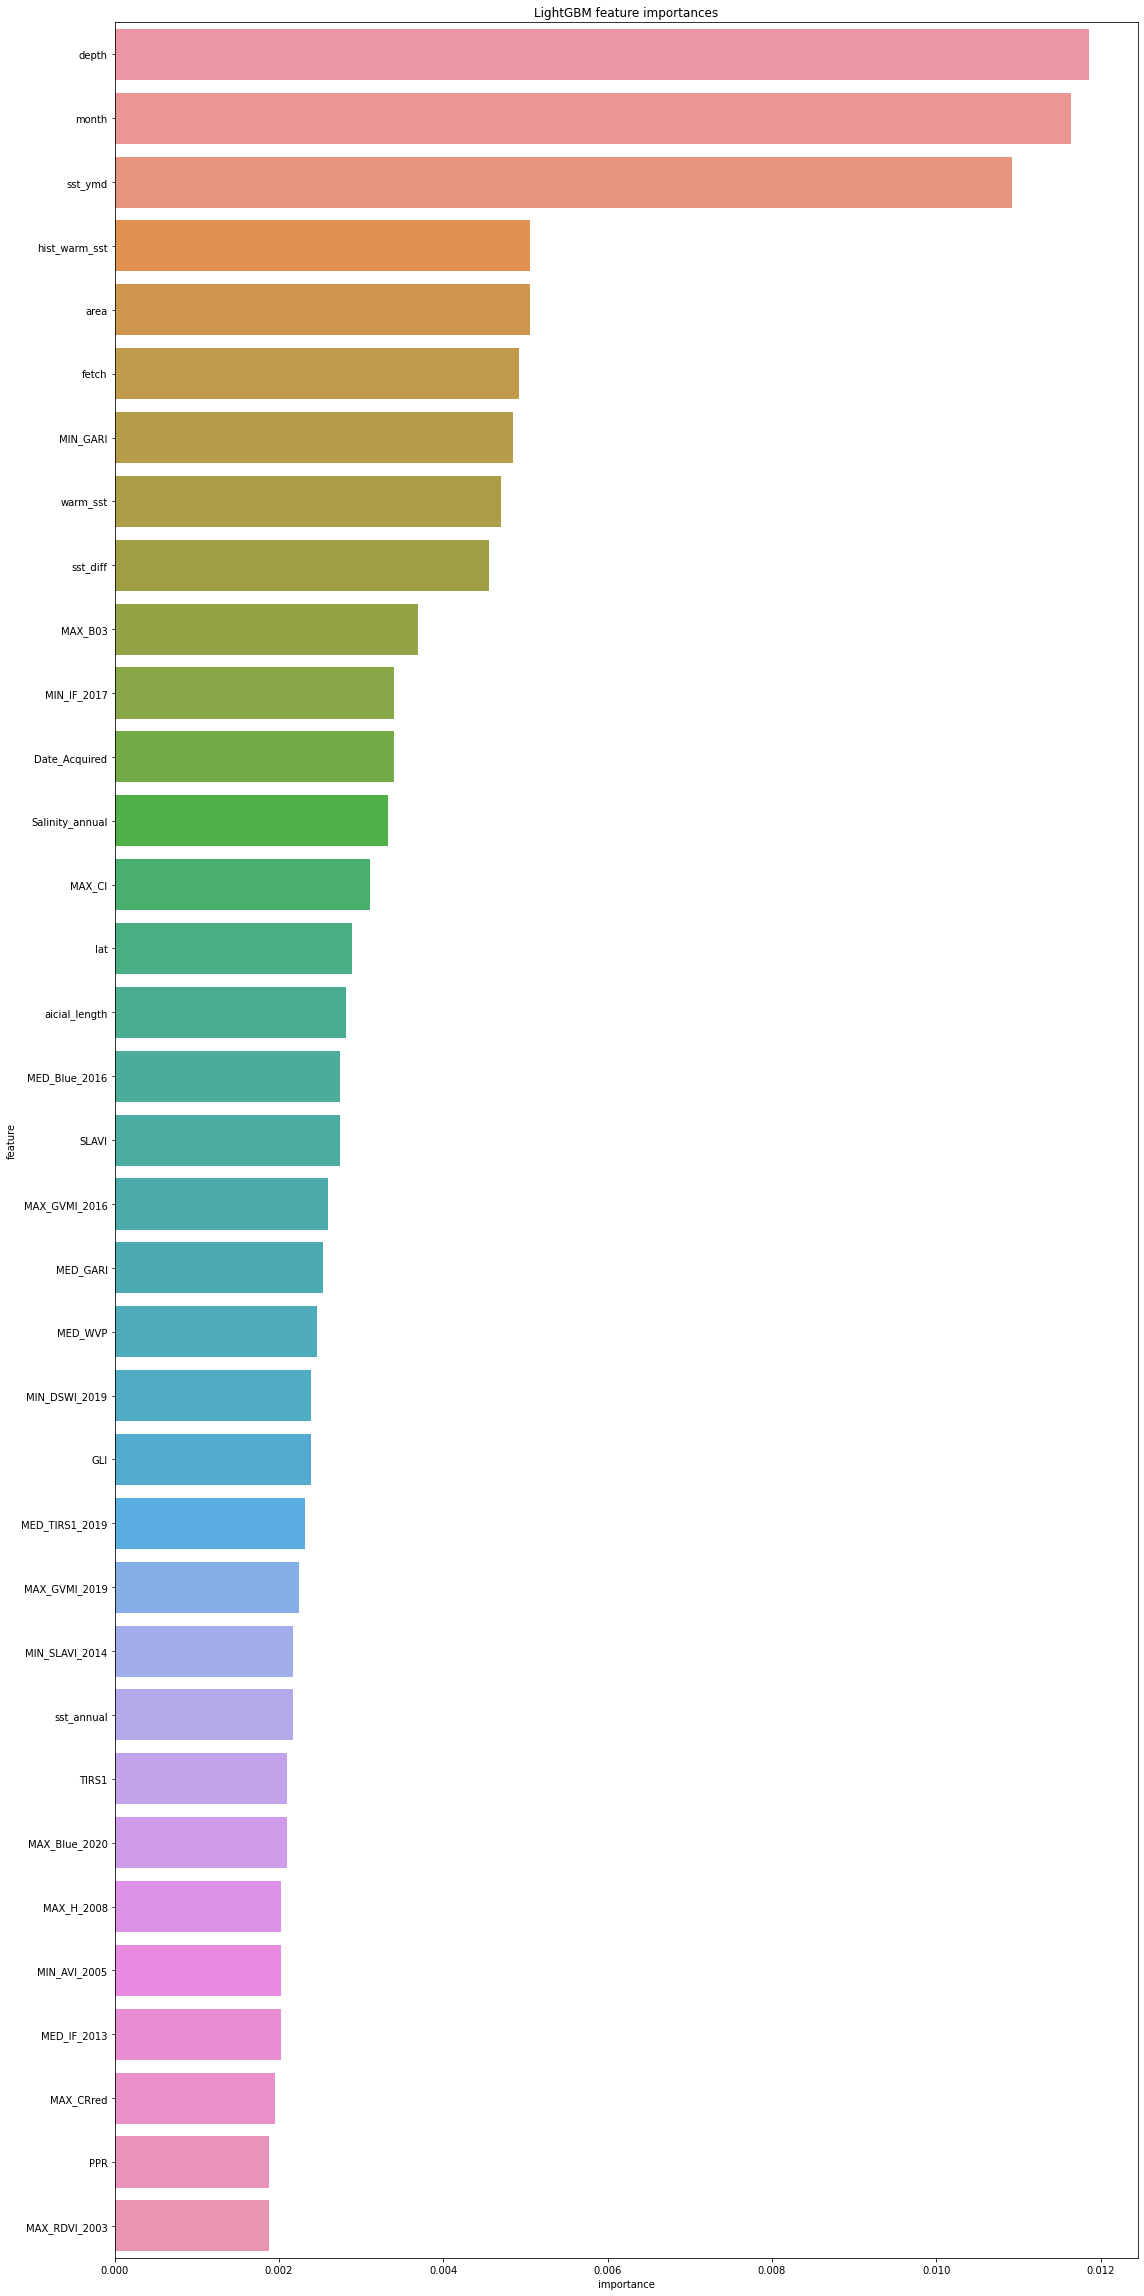

In [26]:
model1 = lgb.LGBMClassifier(**params1)
flag_oof, flag_test_pred = get_pred(train, test, CFG.fold_target1, CFG.target_cols1, model1, isFlag=True)

In [27]:
flag_oof["flag_state"] = (flag_oof["flag_pred"]>.5).astype(int)
test["flag_state"] = (np.mean(flag_test_pred, axis=1)>.5).astype(int)

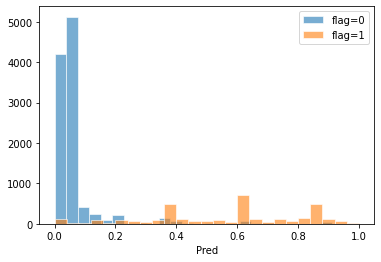

In [28]:
plt.hist(flag_oof.loc[flag_oof.flag_state==0]["cover"], label='flag=0', bins=25, edgecolor='white', alpha=.6)
plt.hist(flag_oof.loc[flag_oof.flag_state==1]["cover"], label='flag=1', bins=25, edgecolor='white', alpha=.6)
plt.xlabel("Pred")
plt.legend()
plt.show()

In [29]:
big_train = flag_oof.loc[flag_oof.flag_state==1].reset_index(drop=True)
big_test = test.loc[test.flag_state==1]
print(big_train.shape, big_test.shape)

small_train = flag_oof.loc[flag_oof.flag_state==0].reset_index(drop=True)
small_test = test.loc[test.flag_state==0]
print(small_train.shape, small_test.shape)

(3415, 3474) (430, 3467)
(10725, 3474) (3609, 3467)


fold
0    961
1    818
2    818
3    818
dtype: int64

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[6]	valid_0's rmse: 0.223931
RMSE 0.22393126046170586
===============  FOLD : 1  ===============


<ipython-input-25-5820d0f1dec2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[7]	valid_0's rmse: 0.259611
RMSE 0.25961071987230866
===============  FOLD : 2  ===============


<ipython-input-25-5820d0f1dec2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[34]	valid_0's rmse: 0.25277
RMSE 0.2527698522031963
===============  FOLD : 3  ===============


<ipython-input-25-5820d0f1dec2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[3]	valid_0's rmse: 0.224261
RMSE 0.22426054120884745


<ipython-input-25-5820d0f1dec2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


,feature,importance
905,MAX_Blue_2020,0.017333
2339,MED_NLI_2014,0.007333
2171,MIN_Blue_2014,0.006667
3004,MAX_DSWI_2005,0.006667
2234,sunAzimuth,0.006000
153,MIN_CI_2015,0.006000
311,IF,0.006000
1525,MAX_VARIgreen_2019,0.006000
799,TIRS2,0.005333
784,sst_ymd,0.005333


RMSE 0.2400125264075228


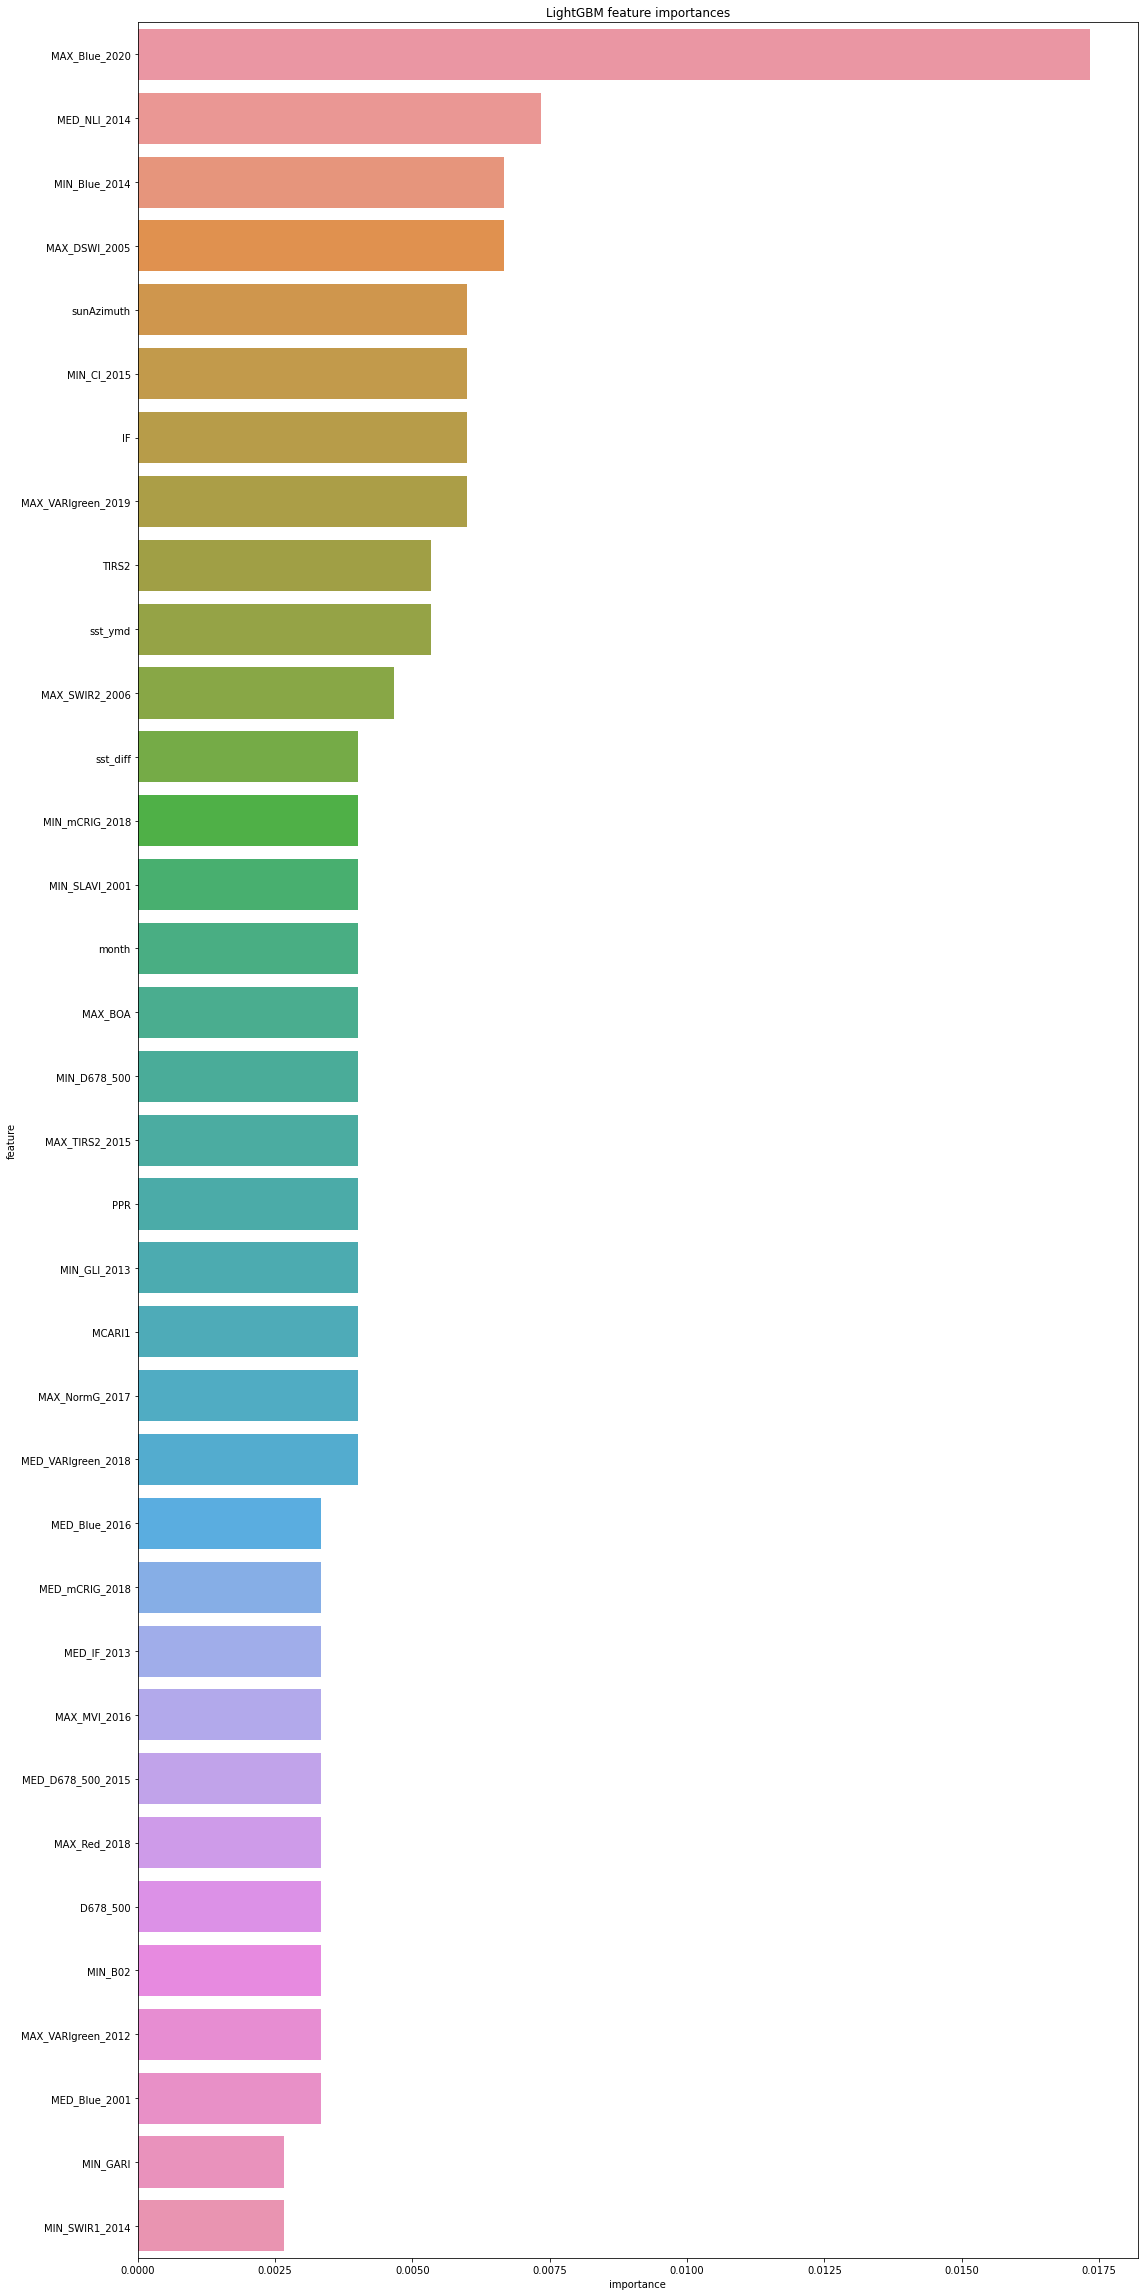

In [30]:
model2 = lgb.LGBMRegressor(**params2)
big_oof, big_test_pred = get_pred(big_train, big_test, CFG.fold_target3, CFG.target_cols2, model2)

fold
0    2681
1    2683
2    2679
3    2682
dtype: int64

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[11]	valid_0's rmse: 0.10725


<ipython-input-25-5820d0f1dec2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


RMSE 0.10724992247736846
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[14]	valid_0's rmse: 0.0875847


<ipython-input-25-5820d0f1dec2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


RMSE 0.08758470131707086
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[3]	valid_0's rmse: 0.0737835


<ipython-input-25-5820d0f1dec2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


RMSE 0.07378353800381743
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[2]	valid_0's rmse: 0.120834


<ipython-input-25-5820d0f1dec2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


RMSE 0.12083434922291063


,feature,importance
324,year,0.035556
854,warm_sst,0.016667
2160,river_dist,0.013333
145,fetch,0.012222
859,MED_IF_2013,0.010000
2100,Date_Acquired,0.010000
1299,MED_IF_2020,0.008889
784,sst_ymd,0.007778
787,MED_VARIgreen_2008,0.005556
2915,Salinity_annual,0.005556


RMSE 0.09902275780632591


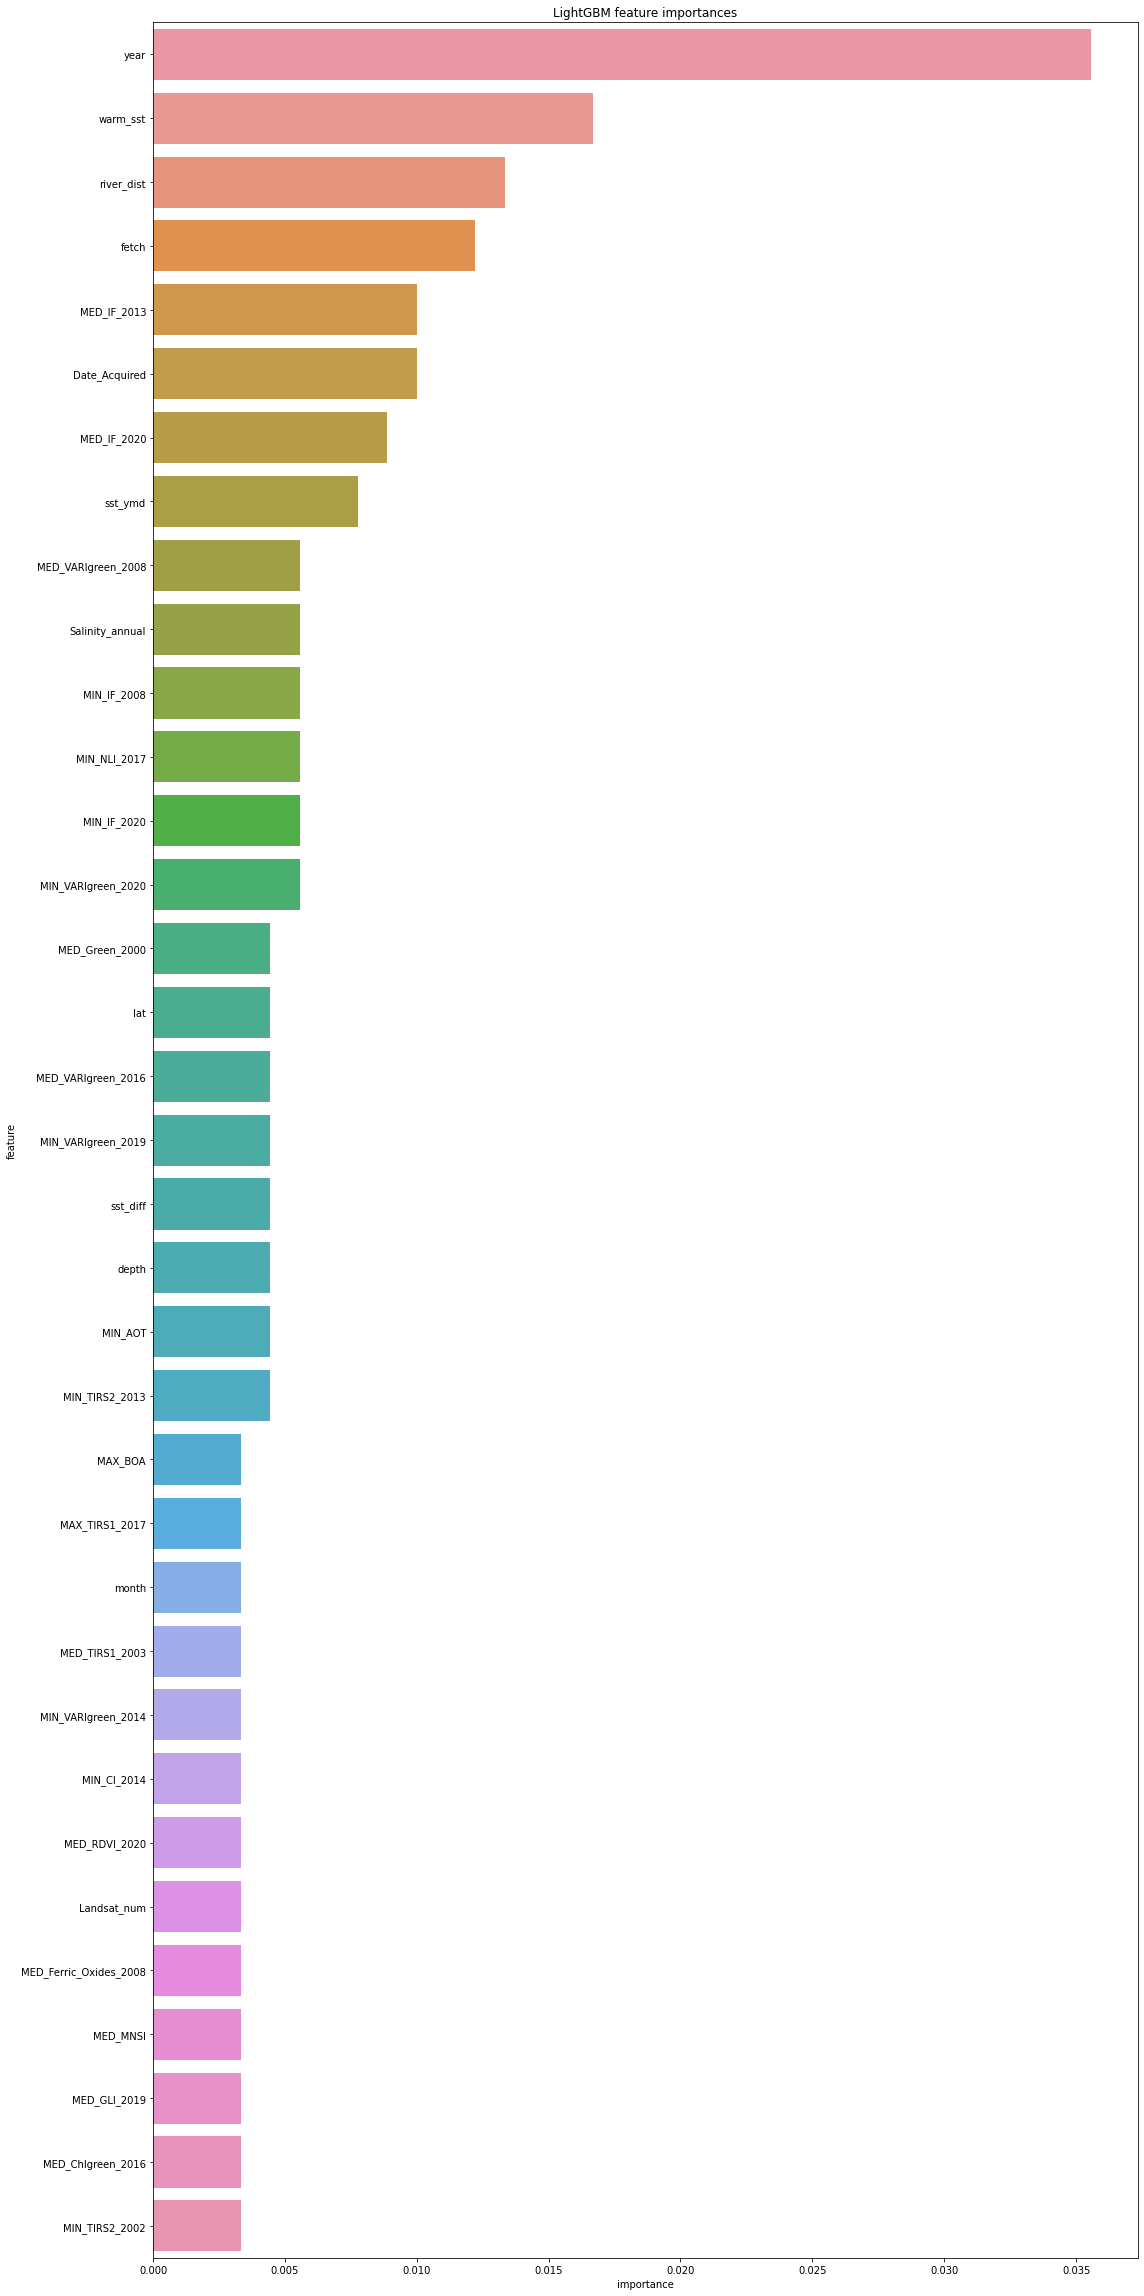

In [31]:
small_oof, small_test_pred = get_pred(small_train, small_test, CFG.fold_target2, CFG.target_cols2, model2)

In [32]:
_oof = pd.concat([big_oof,small_oof])
get_score(_oof["cover"], _oof["_pred"])

RMSE 0.14611629315615984


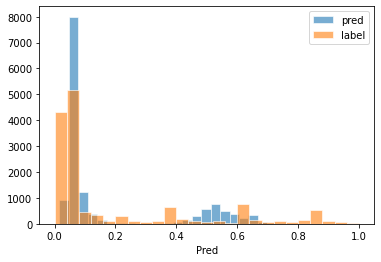

In [33]:
plt.hist(_oof._pred, label='pred', bins=25, edgecolor='white', alpha=.6)
plt.hist(_oof.cover, label="label", bins=25, edgecolor='white', alpha=.6)
plt.xlabel("Pred")
plt.legend()
plt.show()

In [34]:
big_test["pred"] = np.mean(big_test_pred, axis=1)
small_test["pred"] = np.mean(small_test_pred, axis=1)

pred_df = pd.concat([big_test,small_test])
pred_df = pred_df.sort_index()
pred_df

<ipython-input-34-af2995658256>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_test["pred"] = np.mean(big_test_pred, axis=1)
<ipython-input-34-af2995658256>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_test["pred"] = np.mean(small_test_pred, axis=1)


,id,lat,lon,area,YMD,year,month,depth_original,cliff_length,aicial_length,...,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20,mesh20_left,mesh20_right,flag_state,pred
0,0,24.352222,124.202674,20.0,2002.12,2002.0,12.0,0.5,0.000000,725.621704,...,-3.203797,4.297234,926.905329,1.669992,0.194766,3624_20,3624,20,0,0.086521
1,1,24.420028,124.078583,20.0,20100723,2010.0,7.0,NaN,0.000000,0.000000,...,-2.222276,2.263106,57.661693,4.274851,-79.273275,3624_20,3624,20,0,0.078866
2,2,26.494197,127.836013,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,13.8,73.183418,80.595177,...,-2.060505,2.099250,42.672829,5.655713,-2.061417,3927_23,3927,23,0,0.060180
3,3,26.183639,127.319361,20.0,20100805,2010.0,8.0,NaN,0.000000,0.000000,...,-2.708627,-10.433323,45.061952,1.546086,-14.527890,3927_11,3927,11,0,0.055571
4,4,24.761089,125.269009,20.0,NaN,2019.0,10.0,-0.5,0.000000,34.796036,...,-5.249625,2.563503,80.374689,1.827876,-6.335208,3725_01,3725,1,0,0.106776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,4034,26.702075,127.873347,20.0,NaN,2019.0,9.0,0.4,0.000000,20.594961,...,-3.207146,3.633575,60.936945,3.053976,-28.354402,4027_03,4027,3,0,0.068038
4035,4035,24.337028,124.232694,20.0,20101122,2010.0,11.0,NaN,0.000000,0.000000,...,-2.385447,2.495430,75.231230,3.946128,-2.112646,3624_20,3624,20,0,0.067698
4036,4036,26.493121,127.839918,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,0.1,76.439651,133.127228,...,-4.397375,4.403977,117.513676,1.904304,0.601280,3927_23,3927,23,1,0.567543
4037,4037,24.068778,123.804194,20.0,20110415,2011.0,4.0,NaN,73.660492,0.000000,...,-3.821984,2.203933,121.654726,2.282056,-2.029225,3623_03,3623,3,0,0.070749


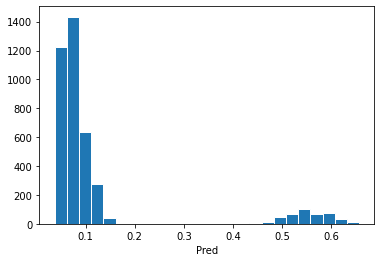

,id,lat,lon,area,YMD,year,month,depth_original,cliff_length,aicial_length,...,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20,mesh20_left,mesh20_right,flag_state,pred
0,0,24.352222,124.202674,20.0,2002.12,2002.0,12.0,0.5,0.000000,725.621704,...,-3.203797,4.297234,926.905329,1.669992,0.194766,3624_20,3624,20,0,0.086521
1,1,24.420028,124.078583,20.0,20100723,2010.0,7.0,NaN,0.000000,0.000000,...,-2.222276,2.263106,57.661693,4.274851,-79.273275,3624_20,3624,20,0,0.078866
2,2,26.494197,127.836013,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,13.8,73.183418,80.595177,...,-2.060505,2.099250,42.672829,5.655713,-2.061417,3927_23,3927,23,0,0.060180
3,3,26.183639,127.319361,20.0,20100805,2010.0,8.0,NaN,0.000000,0.000000,...,-2.708627,-10.433323,45.061952,1.546086,-14.527890,3927_11,3927,11,0,0.055571
4,4,24.761089,125.269009,20.0,NaN,2019.0,10.0,-0.5,0.000000,34.796036,...,-5.249625,2.563503,80.374689,1.827876,-6.335208,3725_01,3725,1,0,0.106776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,4034,26.702075,127.873347,20.0,NaN,2019.0,9.0,0.4,0.000000,20.594961,...,-3.207146,3.633575,60.936945,3.053976,-28.354402,4027_03,4027,3,0,0.068038
4035,4035,24.337028,124.232694,20.0,20101122,2010.0,11.0,NaN,0.000000,0.000000,...,-2.385447,2.495430,75.231230,3.946128,-2.112646,3624_20,3624,20,0,0.067698
4036,4036,26.493121,127.839918,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,0.1,76.439651,133.127228,...,-4.397375,4.403977,117.513676,1.904304,0.601280,3927_23,3927,23,1,0.567543
4037,4037,24.068778,123.804194,20.0,20110415,2011.0,4.0,NaN,73.660492,0.000000,...,-3.821984,2.203933,121.654726,2.282056,-2.029225,3623_03,3623,3,0,0.070749


In [35]:
pred_df["pred"] = pred_df["pred"].apply(lambda x: x if x>0 else 0)
pred_df["pred"] = pred_df["pred"].apply(lambda x: x if x<1 else 1)
pred_df[["pred"]].to_csv(os.path.join(OUTPUT_DIR, f'submit_{CFG.model}_seed{CFG.seed}_ver{CFG.ver}.csv'), header=False)

plt.hist(pred_df.pred,bins=25,edgecolor='white')
plt.xlabel("Pred")
plt.show()

display(pred_df)